In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.4g}'.format

import enlopy as el

# Generate energy loads using monthly and daily profiles for a working and a non-working day

Create random monthly and daily loads

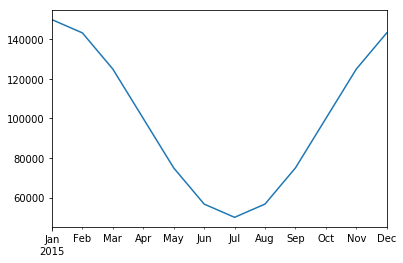

In [2]:
ML  = (np.cos(2 * np.pi/12 * np.linspace(0,11,12)) * 50 + 100 ) * 1000  # monthly load
ML = el.make_timeseries(ML) #convenience wrapper around pd.DataFrame with pd.DateTimeindex
ML.plot()

Create normalized random daily load for a working and non-working day

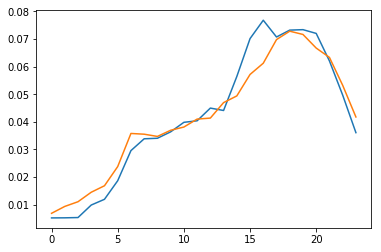

In [3]:
DWL =  el.gen_daily_stoch_el() #daily load working

DNWL = el.gen_daily_stoch_el() #daily load non working

plt.plot(DNWL)
plt.plot(DWL)

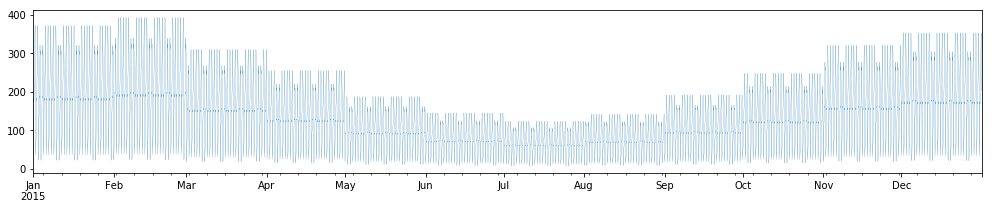

In [4]:
#Define the weighting factor of energy during working and non-working days.
Weight = .55 # i.e energy will be split 55% in working day 45% non working day

Load1 =  el.gen_load_from_daily_monthly(ML, DWL, DNWL, Weight)
Load1.name = 'House1'
Load1.plot(figsize=(17,3), linewidth =.2, grid = False);

Check if the total sum of energy is the same

In [5]:
print ('error = {:.2f}'.format(Load1.sum() - ML.sum()))

error = 0.00


# Reshape (days - hours) and plot heatmap 

In [6]:
el.reshape_timeseries(Load1, x='month', y='hour')

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,971.8,929.4,809.8,651.4,482.2,369.3,326.4,364.5,488.6,647.8,808,935.3
1,1254,1200,1045,844.5,617.6,478.8,423.9,466.9,633.4,835.7,1040,1215
2,1448,1387,1207,977.7,711.3,554.3,491.1,537.8,733.3,965.4,1200,1407
3,2005,1918,1671,1346,992.1,763.4,675,750,1010,1336,1665,1935
4,2346,2245,1955,1575,1162,892.9,789.3,878.7,1181,1564,1950,2262
5,3380,3232,2816,2264,1678,1284,1134,1269,1698,2253,2811,3250
6,5136,4911,4280,3437,2554,1949,1721,1931,2578,3424,4273,4933
7,5267,5033,4389,3515,2630,1993,1758,1988,2636,3511,4387,5039
8,5183,4952,4319,3457,2590,1960,1729,1958,2593,3455,4319,4954


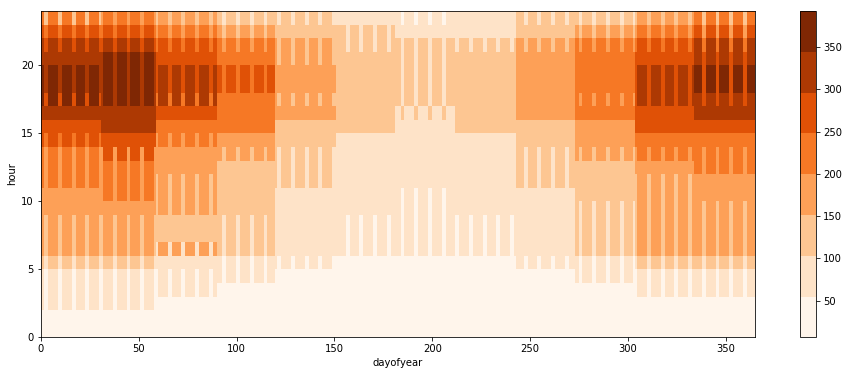

In [7]:
el.plot_heatmap(Load1, edgecolors='none')

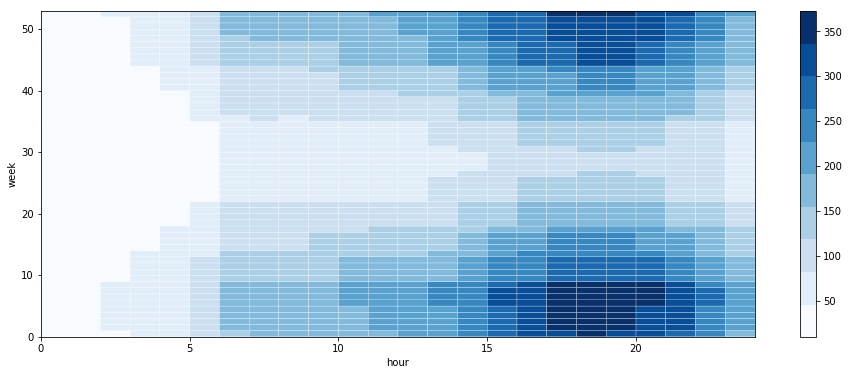

In [8]:
el.plot_heatmap(Load1, x='hour', y='week',bins=10, aggfunc='mean', cmap='Blues' ,edgecolors='w')

# Plots

## Plot percentiles

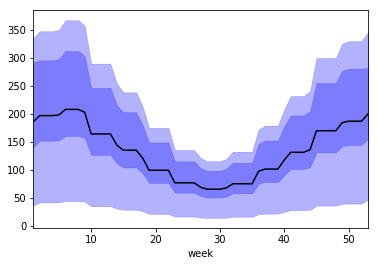

In [9]:
el.plot_percentiles(Load1, x='week', zz='hour')

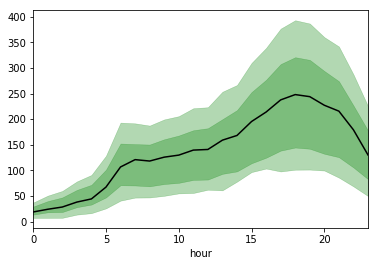

In [10]:
el.plot_percentiles(Load1, x='hour', zz='dayofyear', perc_list=[[1,99], [25,75], 50],color='green')

## 3d plots

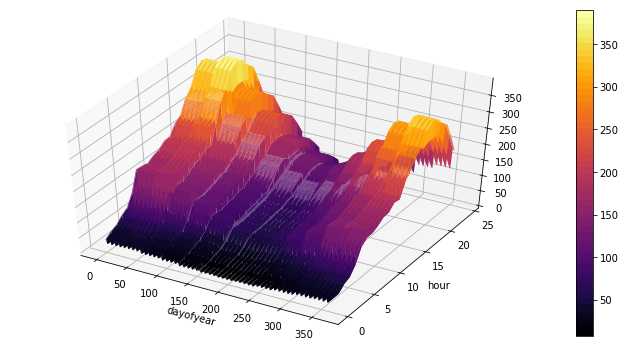

In [11]:
el.plot_3d(Load1, bins=50, cmap='inferno')

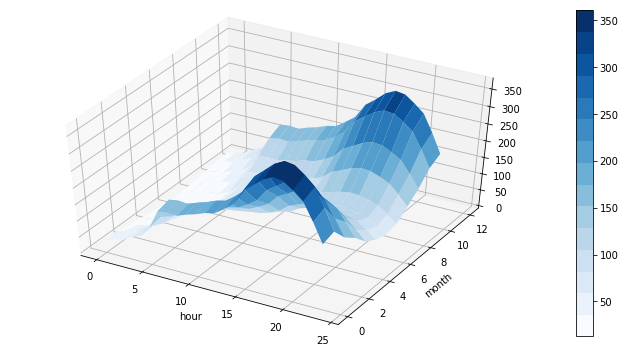

In [12]:
el.plot_3d(Load1, x='hour', y='month', aggfunc='mean', cmap='Blues')

## Boxplot

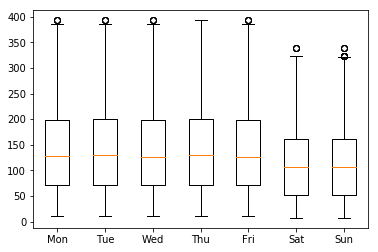

In [13]:
el.plot_boxplot(Load1, by='day')

## Rugplot

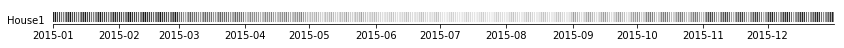

In [14]:
el.plot_rug(Load1, on_off=False, cmap='Greys')

It can accept a dataframe of timeseries and optionally normalize by the maximum value of the whole DataFrame


In [15]:
# Generate dummy dataframe of load profiles
df_many = pd.concat([Load1, 3 * Load1, Load1['Jun 2015':'Nov 2015']], axis=1)
df_many.columns = ['House1', 'House2', 'House3']

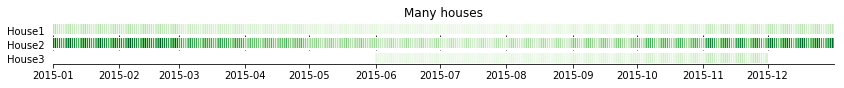

In [16]:
el.plot_rug(df_many, cmap='Greens', fig_title='Many houses', normalized=True)

# Get and plot Load Duration Curve of load

In [17]:
el.get_LDC(Load1)

(array([1.14155251e-04, 2.28310502e-04, 3.42465753e-04, ...,
        9.99771689e-01, 9.99885845e-01, 1.00000000e+00]),
 array([393.06740417, 393.06740417, 393.06740417, ...,   7.24227434,
          7.24227434,   7.24227434]))

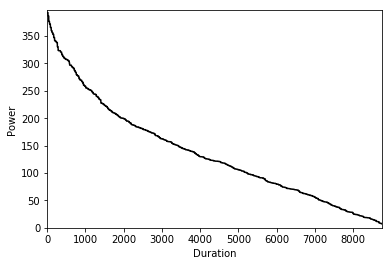

In [18]:
el.plot_LDC(Load1, x_norm=False)

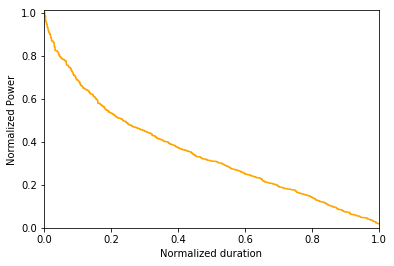

In [19]:
el.plot_LDC(Load1, y_norm=True, color='Orange')

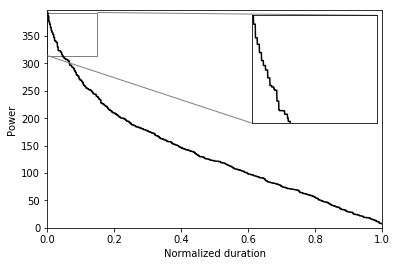

In [20]:
el.plot_LDC(Load1, zoom_peak=True)

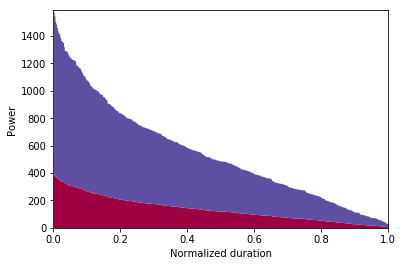

In [21]:
#Works also for 2-D
el.plot_LDC(df_many[['House1', 'House2']])

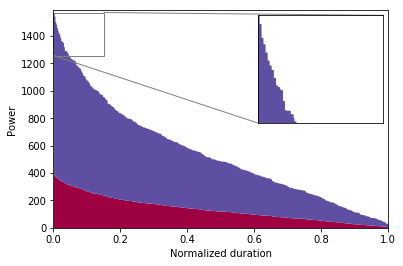

In [22]:
el.plot_LDC(df_many[['House1', 'House2']],zoom_peak=True)

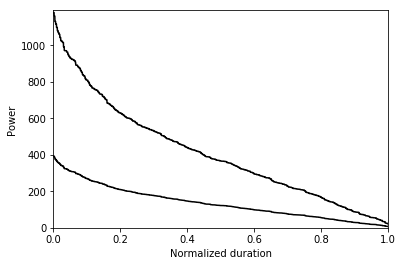

In [23]:
el.plot_LDC(df_many[['House1', 'House2']],stacked=False)

# Archetypes

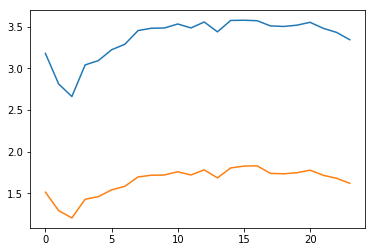

In [24]:
plt.plot(el.get_load_archetypes(Load1,2));

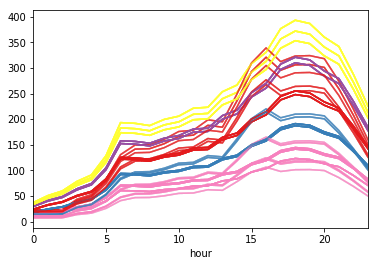

<Figure size 432x288 with 0 Axes>

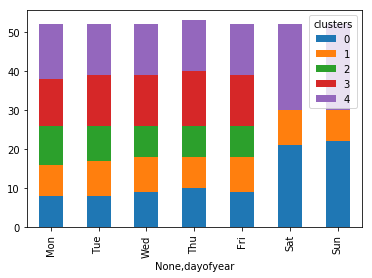

In [25]:
el.get_load_archetypes(Load1, 5, plot_diagnostics=True);

# Add noise to a load

Forcing Datetimeindex into passed timeseries.For more accurate results please pass a pandas time-indexed timeseries.


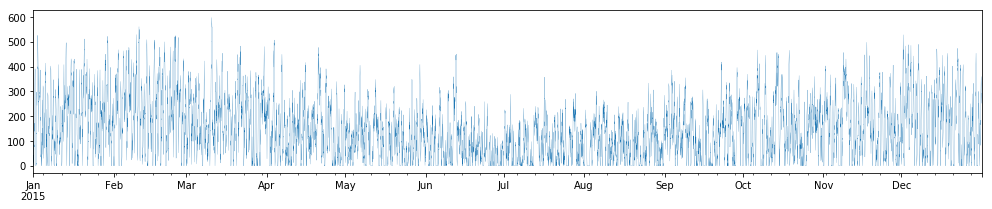

In [26]:
Load1_noise = el.add_noise(Load1, 3, 100) # Gauss Markov noise

fig = plt.figure(figsize=(14,3))

#plt.plot(Load1_noise,linewidth =.3)
Load1_noise.plot(figsize=(17,3), linewidth =.2, grid = False)
Load1_noise.name='Noisy'

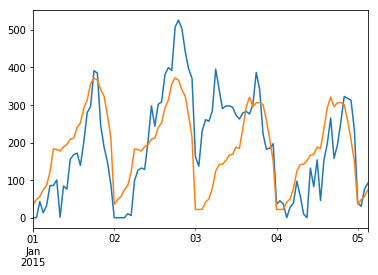

In [27]:
Load1_noise.iloc[0:100].plot()
Load1.iloc[0:100].plot()

/home/kotzer/anaconda3/envs/enlopy/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


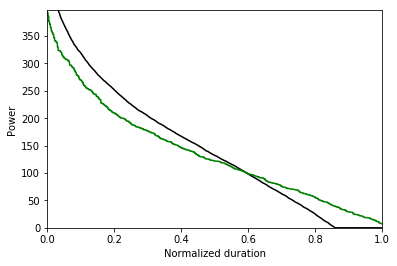

In [28]:
el.plot_LDC(Load1_noise)
el.plot_LDC(Load1, color='g')

# Gather statistics

In [29]:
el.get_load_stats(Load1)

,2015
Autocorrelation(1),0.9369
Average,137
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.3485
Load ratio (max/min),54.27
Max,393.1
Min (2%),7.242
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-111.031, 47.785)"
Sum,1.2e+06


We can also check the statistics per defined time period. Example for month ('m'):

In [30]:
el.get_load_stats(Load1, per='m') 

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
Autocorrelation(1),0.9091,0.9093,0.9106,0.9099,0.91,0.9099,0.9096,0.9114,0.9099,0.9091,0.9109,0.9096
Average,201.6,213.2,168,138.9,100.8,78.75,67.2,76.21,104.2,134.4,173.6,192.6
Biggest duration of consecutive zero load,0,0,0,0,0,0,0,0,0,0,0,0
Load Factor (peakiness),0.542,0.5425,0.542,0.5445,0.5387,0.5445,0.5454,0.5387,0.5445,0.542,0.541,0.5454
Load ratio (max/min),17.01,17.01,17.01,17.01,17.01,17.01,17.01,17.01,17.01,17.01,17.01,17.01
Max,372,393.1,310,255.1,187.1,144.6,123.2,141.5,191.3,248,320.9,353.2
Min (2%),21.86,23.1,18.22,14.99,11,8.5,7.242,8.315,11.24,14.57,18.86,20.76
Periodicity,"(124.0, 23.0)","(112.0, 24.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)","(120.0, 24.0)","(124.0, 23.0)"
Ramps (98%),"(-178.112, 61.215)","(-188.222, 64.689)","(-148.426, 51.012)","(-122.145, 41.979)","(-89.611, 30.798)","(-69.254, 23.802)","(-59.005, 20.279)","(-67.744, 23.283)","(-91.608, 31.485)","(-118.741, 40.81)","(-153.659, 52.811)","(-169.11, 58.121)"
Sum,1.5e+05,1.433e+05,1.25e+05,1e+05,7.5e+04,5.67e+04,5e+04,5.67e+04,7.5e+04,1e+05,1.25e+05,1.433e+05


# Load Shifting

The following function performs load shifting  (or peak shaving) from peak to off-peak timesteps based on given specifications, percentage of peak reduction and percentage of hours per month to peak.

In [31]:
Load1_DR = el.gen_demand_response(Load1, 0.15, 0.30)

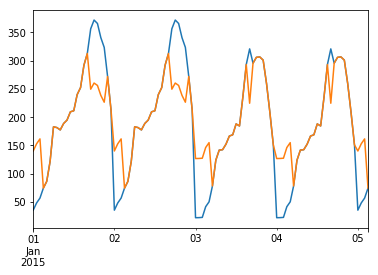

In [32]:
Load1[0:100].plot()
Load1_DR[0:100].plot()

In [33]:
el.get_load_stats(Load1)

,2015
Autocorrelation(1),0.9369
Average,137
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.3485
Load ratio (max/min),54.27
Max,393.1
Min (2%),7.242
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-111.031, 47.785)"
Sum,1.2e+06


As shown below it is less peaky as expected

In [34]:
el.get_load_stats(Load1_DR)

,2015
Autocorrelation(1),0.9231
Average,136.2
Biggest duration of consecutive zero load,0
Load Factor (peakiness),0.412
Load ratio (max/min),15.34
Max,330.5
Min (2%),21.55
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-72.709, 51.012)"
Sum,1.193e+06


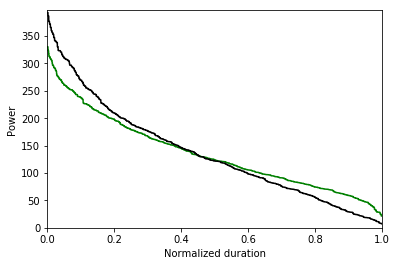

In [35]:
el.plot_LDC(Load1_DR, color='g')
el.plot_LDC(Load1, ax=plt.gca())

# Sample new loads from load duration curve

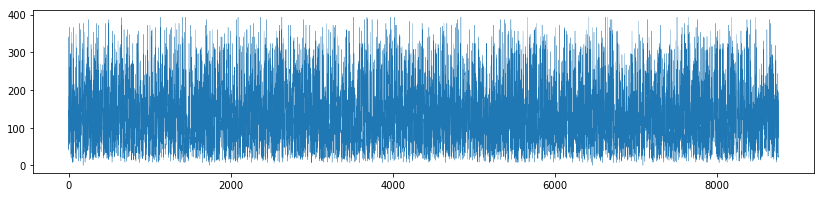

In [36]:
Load1a = el.gen_load_from_LDC(el.get_LDC(Load1))
fig = plt.figure(figsize=(14,3))
plt.plot(Load1a, linewidth =.3)

Check whether they have the same distribution

Forcing Datetimeindex into passed timeseries.For more accurate results please pass a pandas time-indexed timeseries.


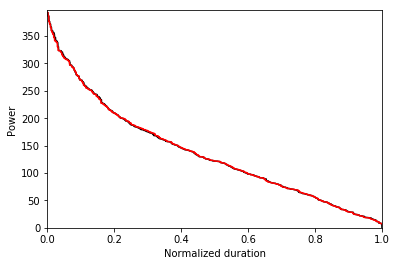

In [37]:
el.plot_LDC(Load1a)
el.plot_LDC(Load1, color='red', ax=plt.gca())